<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Box-Office-Gross" data-toc-modified-id="Box-Office-Gross-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Box Office Gross</a></span></li><li><span><a href="#name.basics-csv" data-toc-modified-id="name.basics-csv-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>name.basics csv</a></span></li><li><span><a href="#imdb.title.akas.csv" data-toc-modified-id="imdb.title.akas.csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>imdb.title.akas.csv</a></span></li><li><span><a href="#imdb.title.basics.csv" data-toc-modified-id="imdb.title.basics.csv-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>imdb.title.basics.csv</a></span></li><li><span><a href="#Merge-gross_df-and-titles_df" data-toc-modified-id="Merge-gross_df-and-titles_df-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Merge gross_df and titles_df</a></span></li><li><span><a href="#imdb.title.crew.csv.gz" data-toc-modified-id="imdb.title.crew.csv.gz-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>imdb.title.crew.csv.gz</a></span></li><li><span><a href="#imdb.title.principals.csv" data-toc-modified-id="imdb.title.principals.csv-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>imdb.title.principals.csv</a></span></li><li><span><a href="#imdb.title.ratings.csv.gz" data-toc-modified-id="imdb.title.ratings.csv.gz-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>imdb.title.ratings.csv.gz</a></span></li><li><span><a href="#rt.movie_info.tsv" data-toc-modified-id="rt.movie_info.tsv-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>rt.movie_info.tsv</a></span></li><li><span><a href="#rt.reviews.tsv" data-toc-modified-id="rt.reviews.tsv-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>rt.reviews.tsv</a></span></li><li><span><a href="#tmdb.movies.csv" data-toc-modified-id="tmdb.movies.csv-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>tmdb.movies.csv</a></span></li><li><span><a href="#Joining-Relevant-Tables" data-toc-modified-id="Joining-Relevant-Tables-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Joining Relevant Tables</a></span></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Daniel Ross-Leutwyler
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Box Office Gross

In this notebook I will perform EDA on the dataset, beginning with the bom.movie_gross .csv

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
bom_gross = 'zippedData/bom.movie_gross.csv'
gross_df = pd.read_csv(bom_gross)

In [94]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [95]:
gross_df.year.value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [96]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [97]:
gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The bom.movie.gross csv table appears to contain a data fram of movies from 2011-2018. Each row represents one movie, and contains columns with the following values:

title, studio, domestic_gross, foreign_gross, and year.

There are no null entries in the title column, which is an object, as I would expect.

There are 5 null entries in the studio column, which is an object, as I would expect.

There are 28 null values in the domestic gross column which is a float, as I would expect.

There are 1350 null values in the foreign gross column, which is an object, and will need to be cast as a float.  ***hypothesis: foreign_gross should be summed with domestic_gross, as the global nature of media today makes the foreign/domestic binary less important. ***

There are no nulls in the year column, which is an integer, which is what we would expect.


In [98]:
# while trying to cast the foreign gross column as a float, I realized there
# are ',' that have to be removed before the column can be made into float
gross_df['foreign_gross'].str.contains(',').sum()

5

In [99]:
# removing commas to be able to cast as float and checking sanity
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(',','')
gross_df['foreign_gross'].str.contains(',').sum()

0

In [100]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].astype(float)

In [101]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [102]:
## small function to look at the rows with null values
def see_nans(df, cols=None): 
    if cols is None:
        cols = df.columns
    return df[df[cols].isnull().any(axis=1)]

see_nans(gross_df)

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
222,Flipped,WB,1800000.0,NaN,2010
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [103]:
# as almost 40% foreign gross is null, we need to investigate to see if we
# replace, drop, or ignore the NaNs.
gross_df_dropnans = gross_df['foreign_gross'].dropna()

print(f'The mean gross sales in foreign markets is {round(gross_df_dropnans.mean()/1000000)} millon')
print(f'The median gross sales in foreign markets is {round(gross_df_dropnans.median()/1000000)} millon')

The mean gross sales in foreign markets is 75.0 millon
The median gross sales in foreign markets is 19.0 millon


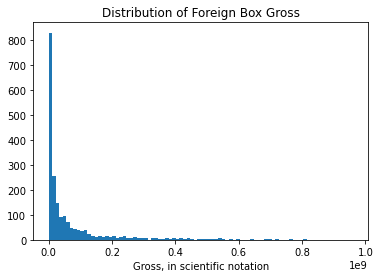

In [104]:
fig, ax = plt.subplots()
ax.hist(gross_df_dropnans, bins='auto')
ax.set_title('Distribution of Foreign Box Gross')
ax.set_xlabel('Gross, in scientific notation');

AS there is a strong negative skew and a very long tail, it makes sense to use the median value to replace our NaNs, as opposed to the mean value.

In [105]:
gross_df['adjusted_foreign_gross'] = gross_df['foreign_gross'].fillna(gross_df_dropnans.median())

In [106]:
gross_df['total_sales'] = (gross_df['domestic_gross'] + gross_df['adjusted_foreign_gross'])

In [107]:
gross_df.sort_values('total_sales', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,895500000.0,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,946400000.0,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,646900000.0,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,960500000.0,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,712400000.0,1.332600e+09
...,...,...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000.0,2015,49600000.0,NaN
2392,Finding Mr. Right 2,CL,NaN,114700000.0,2016,114700000.0,NaN
2468,Solace,LGP,NaN,22400000.0,2016,22400000.0,NaN
2595,Viral,W/Dim.,NaN,552000.0,2016,552000.0,NaN


In [108]:
top_100 = gross_df.sort_values('total_sales', ascending=False)[:100]

In [109]:
top_100.head(20)

,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,895500000.0,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,946400000.0,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,646900000.0,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,960500000.0,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,712400000.0,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,891800000.0,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,875700000.0,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,759500000.0,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,634200000.0,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,805800000.0,1.214800e+09


It will be interesting to join these findings with another of the tables to learn more about the distribution of genres in the most commercially and critically successful movies.

16 of the top 20 movies are part of a series. \
7 of the top 20 are 'superhero' movies\
5 of the top 20 are animated\
5 of the top 20 are science fiction\
8 of the top 20 are arguable kids' movies

<insert ugly pie chart here that adds up to over 100%>

## name.basics csv

In [110]:
name_basics_url = 'zippedData/imdb.name.basics.csv'
name_df = pd.read_csv(name_basics_url)

In [111]:
name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [112]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [113]:
see_nans(name_df)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


**The relevance of this data frame is not clear.** Would most likely be useful to drop the birth year (high NaNs) and drop all the dead names from it, as they cannot help us with make movies.

It may be an interesting side quest to try and tie people to the most successful movies via known_for_titles, when making suggestions for who should direct, produce, compose the music, etc.

## imdb.title.akas.csv

In [114]:
title_aka_url = 'zippedData/imdb.title.akas.csv'
title_alias_df = pd.read_csv(title_aka_url)

In [115]:
title_alias_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [116]:
title_alias_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


The usefulness of this dataframe is suspect, unless I decide to tie the names of the talent from names.basic to the names of the movies that they worked on. I'm not sure if this is the direction this EDA will take.

Possible data cleaning tasks for this csv include dealing with nulls (evaluating the importance of the 'language', 'types', and 'attributes' columns in particular.

## imdb.title.basics.csv

In [117]:
title_basics_url = 'zippedData/imdb.title.basics.csv'
title_basics_df = pd.read_csv(title_basics_url)

In [118]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [119]:
title_basics_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [120]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [121]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [122]:
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

The title.basics table appears to contain a data frame primarily of movies from 2010-2018, but also with some titles from ***THE FUTURE***. Each row represents one movie, and contains columns with the following values:

'tconst', 'primary_title', 'original_title', 'start_year','runtime_minutes', 'genres'

There are no null entries in the tconst column, which is an object, as I would expect, and we will use this column as the index to ***join this df with other dfs.***

There are no null entries in the start_year column, which is an integer, as I would expect. ***This column will require cleaning to deal with movies from the future.***

There are significant null entires in the runtime_minutes column, which may be of questionable use. ***It may be worth exploring the relationship between movie length and box office success.***

There are 5408 null values in the genres column. This column will require more exploration as we will need it to help make decisions about what kind of movies Microsoft should be making.


Exploring the start_year column:

In [123]:
title_basics_df[title_basics_df['start_year'] > 2021].head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
821,tt10042446,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
1330,tt10108854,The Hunchback of the Lighthouse,The Hunchback of the Lighthouse,2022,120.0,Drama
2465,tt10251718,Corazones en Llamas 5,Corazones en Llamas 5,2022,NaN,Action
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,NaN,Action


In [124]:
# we will set aside the movies from the future. There may be vaule in
# evaluating them by genre to see what is lined up in the future, but
# this evaluation would be supplementary to our primary question.
future_movies_df = title_basics_df.loc[title_basics_df['start_year'] > 2021]
title_basics_df = title_basics_df.loc[title_basics_df['start_year'] <= 2021]

In [125]:
title_basics_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
Name: start_year, dtype: int64

***Exploring the genre column:***

In [126]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [127]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
0,Toy Story 3,BV,415000000.0,652000000.0,2010,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,664300000.0,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,535700000.0,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,513900000.0,7.526000e+08


In [128]:
# df = pd.merge(title_basics_df, gross_df, left_on='original_title',
#               right_on='title')
# df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016,18700000.0,19800000.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,Oolong Courtyard,CL,37700.0,NaN,2018,18700000.0,18737700.0
2772,tt8802728,The Witch,The Witch,2018,NaN,Horror,The Witch,A24,25100000.0,15300000.0,2016,15300000.0,40400000.0
2773,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Spring Fever,Strand,10800.0,150000.0,2010,150000.0,160800.0
2774,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,16100000.0,20300000.0


## Merge gross_df and titles_df

In [90]:
df = pd.merge(title_basics_df, gross_df, left_on='primary_title',
              right_on='title')
df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016,18700000.0,19800000.0
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,How Long Will I Love U,WGUSA,747000.0,82100000.0,2018,82100000.0,82847000.0
3362,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Helicopter Eela,Eros,72000.0,NaN,2018,18700000.0,18772000.0
3363,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Spring Fever,Strand,10800.0,150000.0,2010,150000.0,160800.0
3364,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Last Letter,CL,181000.0,NaN,2018,18700000.0,18881000.0


In [129]:
df_split = df.copy() 
df_split['genres_split'] = df_split['genres'].str.split(',')
df_split.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,adjusted_foreign_gross,total_sales,genres_split
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,NaN,2016,18700000.0,19800000.0,"[Action, Crime, Drama]"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,"[Adventure, Drama, Romance]"
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,[Drama]
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,[Documentary]
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8000000.0,8744000.0,[Drama]


In [131]:
df_split = df_split.explode('genres_split')

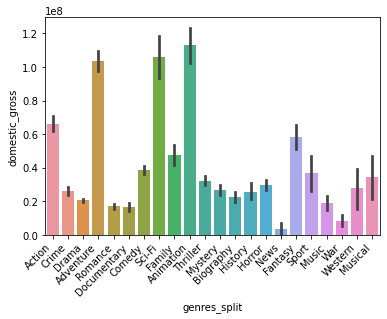

In [135]:
ax = sns.barplot(data=df_split, x='genres_split', y='domestic_gross', ci=68)
plt.xticks(rotation=45, ha='right');

In [86]:
title_basics_df['genres'].value_counts()

Documentary                      32184
Drama                            21484
Comedy                            9177
Horror                            4371
Comedy,Drama                      3519
                                 ...  
Adventure,Fantasy,War                1
Adventure,Horror,Romance             1
Animation,Documentary,Mystery        1
Musical,Mystery,Sci-Fi               1
Adventure,History,Western            1
Name: genres, Length: 1085, dtype: int64

In [87]:
# splitting the concatinated genres
expanded_genre_df = title_basics_df['genres'].str.split(',', expand=True)
new_cols = ['primary', 'secondary', 'tertiary']
expanded_genre_df.columns = new_cols

In [49]:
title_basics_df = title_basics_df.merge(expanded_genre_df, left_index=True, right_index=True)

In [51]:
title_basics_df = title_basics_df.drop('genres', axis=1)
title_basics_df.groupby('primary').sort_values('primary')

KeyError: "['genres'] not found in axis"

In [ ]:
title_basics_df[['primary', 'secondary', 'tertiary']] = title_basics_df[[
    'primary', 'secondary', 'tertiary']].fillna('None')

In [136]:

ax = sns.histplot(data=title_basics_df, x='primary')
ax.set_title('Distribution of Genre Types')
ax.set_xlabel('Genre')
ax.tick_params(axis='x', labelrotation=90)




ValueError: Could not interpret value `primary` for parameter `x`

Excepting documentaries and movies without a genre label, the genre with the most movies is 'drama', followed by 'comedy' and 'action'.

This title_basics_df is now in a format that is more useful for us. I will eventually join it with the gross sales df to explore how certain genres are correlated with box office sales.

## imdb.title.crew.csv.gz

In [ ]:
title_url = 'zippeddata/imdb.title.crew.csv.gz'
pd.read_csv(title_url)

This is a table with what appears to be an index of the moves, with their tconst ID and the corresponding directors and writers with their IDs.

I am going to ignore this table for now.

## imdb.title.principals.csv

In [ ]:
princ_url = 'zippeddata/imdb.title.principals.csv'
principals_df = pd.read_csv(princ_url)

In [ ]:
principals_df.head()

In [ ]:
principals_df.info()

Similarly, this is a table with the movie title as a tconst ID, with the individual pricncipals (director, producer, star, etc.) associated with that movie. I don't believe this will be particularly useful for my analysis.

## imdb.title.ratings.csv.gz

In [ ]:
ratings_url = 'zippeddata/imdb.title.ratings.csv.gz'
ratings_df = pd.read_csv(ratings_url)

In [ ]:
ratings_df.head()

In [ ]:
ratings_df.info()

This table should be very useful once we have merged it with title_basics. I can then compare the ratings on IMDB with the gross sales to explore that correlation.

It does not appear that any cleaning needs to be done. Every column has no nulls, and is of the expected dtype.

## rt.movie_info.tsv

In [ ]:
minfo_url = 'zippeddata/rt.movie_info.tsv'
movie_info_df = pd.read_csv(minfo_url, delimiter='\t')

In [ ]:
movie_info_df.head()

In [ ]:
movie_info_df.tail()

In [ ]:
movie_info_df.info()

This table looks fascinating, but doesn't contain ***relevant*** info. There is no title to associate the info with a particular movie, and the years are outside of the scope of most of our other data. It requires a lot of dtype casting and cleaning and does not appear to be worth investigating further.

## rt.reviews.tsv

In [ ]:
mreviews_url = 'zippeddata/rt.reviews.tsv'
reviews_df = pd.read_csv(mreviews_url, delimiter='\t', encoding='unicode_escape')

In [ ]:
reviews_df.head()

Similar to the movie_info table above, I am not seeing how this table can be used since it is not able to be associated with the movie IDs that the other tables use.

## tmdb.movies.csv

In [ ]:
mov_url = 'zippeddata/tmdb.movies.csv'
movie_df = pd.read_csv(mov_url)

In [ ]:
movie_df.head()

In [ ]:
movie_df.info()

## Joining Relevant Tables

In [ ]:
title_df = title_basics_df.copy()

In [ ]:
title_df.head()

In [ ]:
title_df.info()

In [ ]:
title_sort_df = title_df.sort_values('tconst')

In [ ]:
ratings_sort_df = ratings_df.sort_values('tconst')

In [ ]:
title_ratings_df = title_sort_df.merge(ratings_sort_df, on='tconst')

In [ ]:
title_ratings_df.info()

In [ ]:
title_ratings_df.head()

In [ ]:
title_ratings_df.drop(['original_title', 'tertiary'], axis=1, inplace=True)

In [ ]:
gross_df.sort_values('title')